In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from inception_blocks import *
K.set_image_data_format('channels_first')
from fr_utils import *

Using TensorFlow backend.


In [2]:
def triplet_loss(y_true, y_pred, alpha = 0.2):
    """
    Implementation of the triplet loss as defined by formula (3)
    
    Arguments:
    y_true -- true labels, required when you define a loss in Keras, you don't need it in this function.
    y_pred -- python list containing three objects:
            anchor -- the encodings for the anchor images, of shape (None, 128)
            positive -- the encodings for the positive images, of shape (None, 128)
            negative -- the encodings for the negative images, of shape (None, 128)
    
    Returns:
    loss -- real number, value of the loss
    """
    
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
    
    ### START CODE HERE ### (˜ 4 lines)
    # Step 1: Compute the (encoding) distance between the anchor and the positive, you will need to sum over axis=-1
    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor,positive)),axis=-1)
    # Step 2: Compute the (encoding) distance between the anchor and the negative, you will need to sum over axis=-1
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor,negative)),axis=-1)
    # Step 3: subtract the two previous distances and add alpha.
    basic_loss = tf.add(tf.subtract(pos_dist,neg_dist),alpha)
    # Step 4: Take the maximum of basic_loss and 0.0. Sum over the training examples.
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0.0))
    ### END CODE HERE ###
    
    return loss

FRmodel = faceRecoModel(input_shape=(3, 96, 96))
FRmodel.compile(optimizer = 'adam', loss = triplet_loss, metrics = ['accuracy'])
load_weights_from_FaceNet(FRmodel)

In [3]:

def show_images(image_path_original,image_path_check):
    
    imageA=mpimg.imread(image_path_original)
    imageB=mpimg.imread(image_path_check)
    fig = plt.figure("Comparison")
 
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
 
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
 
    # show the images
    plt.show()

def verify(image_path_original, image_path_check, model): 
    
    encoding_original = img_to_encoding(image_path_original,model)
    encoding_check = img_to_encoding(image_path_check,model)
  
    dist = np.linalg.norm(encoding_original-encoding_check)
    # setup the figure
    
    show_images(image_path_original,image_path_check)
    
    print ("Distance is " , dist)
    if dist < 0.7:
        print("It's similar")
                
    else:
        print("It's not similar")
    return dist

def verify_ml_approach(image_path_original,image_path_check):

    dist = verify(image_path_original, image_path_check, FRmodel)
    
    return dist

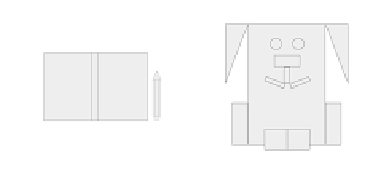

Distance is  0.62450016
It's similar


0.62450016

In [7]:
verify_ml_approach("images/image6.png", "images/image9.png")
#verify_ml_approach("images/Original.png", "images/Negative.png")